In [1]:
from functions import *
from methods import *
import seaborn as sns
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
path = '/Users/irashokar/documents/NOvA/files/Feb_test/DANN/'
with open(path + 'history_DANN_3_feb_weights.pkl','rb') as f1:
    history = pkl.load(f1)

    output_loss: 1.5228 - discriminator_output_loss: 1.0860 - output_accuracy: 0.2292 - discriminator_output_accuracy: 0.3854 


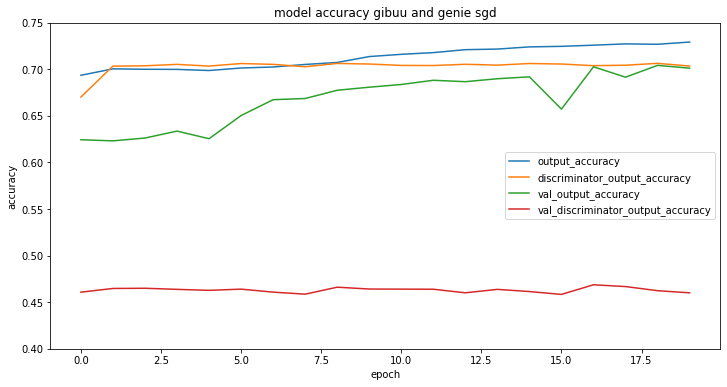

In [12]:
plt.figure(figsize=(12,6))
plt.plot(history.history['output_accuracy'])
plt.plot(history.history['discriminator_output_accuracy'])
plt.plot(history.history['val_output_accuracy'])
plt.plot(history.history['val_discriminator_output_accuracy'])
plt.title('model accuracy gibuu and genie sgd')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['output_accuracy', 'discriminator_output_accuracy', 'val_output_accuracy', 'val_discriminator_output_accuracy'], loc='right')
plt.ylim(0.4,0.75)
plt.show()

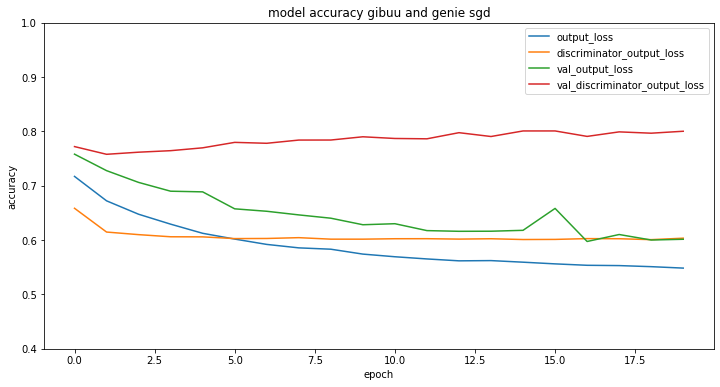

In [16]:
plt.figure(figsize=(12,6))
plt.plot(history.history['output_loss'])
plt.plot(history.history['discriminator_output_loss'])
plt.plot(history.history['val_output_loss'])
plt.plot(history.history['val_discriminator_output_loss'])
plt.title('model accuracy gibuu and genie sgd')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['output_loss', 'discriminator_output_loss', 'val_output_loss', 'val_discriminator_output_loss'], loc='upper right')
plt.ylim(0.4,1.)
plt.show()

In [17]:
with open(path+ 'both_probabilities_short_weights_DANN_2_feb_weights.pkl','rb') as f2:
    probabilities = pkl.load(f2)[0]
print(len(probabilities))
with open(path+ 'both_test_labels_list_short_weights_DANN_2_feb_weights.pkl','rb') as f3:
    test_labels = pkl.load(f3)
print(len(test_labels))
with open(path+ 'both_test_weights_list_short_weights_DANN_2_feb_weights.pkl','rb') as f4:
    gibuu_weights = pkl.load(f4)

14624
14629


In [18]:
predictions = []
for i in probabilities:
    max_index =np.where(i == np.max(i))[0][0]
    predictions.append(max_index)
    
test_vals = []
for i in test_labels:
    max_index =np.where(i == np.max(i))[0][0]
    test_vals.append(max_index)
    
#accuracy
acc = 0
for i in range(len(probabilities)):
    if test_vals[i]==predictions[i]:
        acc+=1
    else:
        pass
acc/=len(test_vals)

true_val = probabilities

print('Probabilities: \n')
print('Accuracy:{} \n'.format(acc))
for i in range(10):
    print(probabilities[i], '\n')
print('Predictions: \n')
print(predictions[:10], '\n')
print('Truth labels: \n')
print(test_vals[:10])

Probabilities: 

Accuracy:0.6150112789664365 

[0.39635986 0.07081976 0.5328204 ] 

[0.6311717  0.08710142 0.28172693] 

[0.20364136 0.0398848  0.75647384] 

[0.551142   0.10870314 0.34015495] 

[0.15551718 0.04127876 0.80320406] 

[0.2838005  0.06711635 0.64908314] 

[0.4988754  0.07896834 0.4221562 ] 

[0.6092079  0.14411943 0.24667259] 

[0.56365997 0.10245001 0.33389002] 

[0.31461155 0.06658765 0.61880076] 

Predictions: 

[2, 0, 2, 0, 2, 2, 0, 0, 0, 2] 

Truth labels: 

[0, 2, 0, 0, 1, 0, 0, 2, 0, 2]


Text(0, 0.5, 'Count')

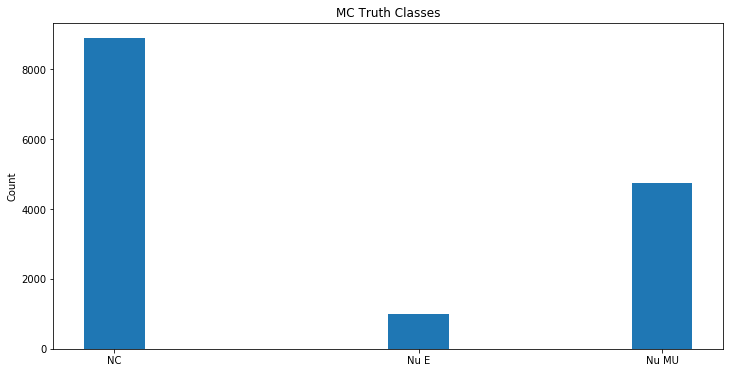

In [19]:
plt.figure(figsize=(12,6))
plt.hist(test_vals)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('MC Truth Classes')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

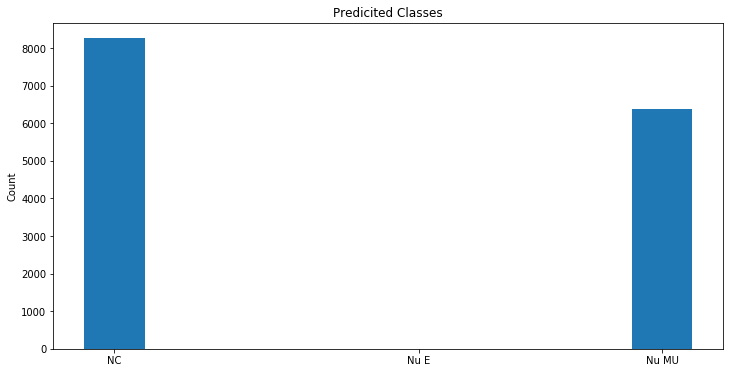

In [20]:
plt.figure(figsize=(12,6))
plt.hist(predictions)
x = [0.1, 1.1, 1.9]
class_names = ['NC', 'Nu E', 'Nu MU']
plt.xticks(x, class_names)
plt.title('Predicited Classes')
plt.ylabel('Count')

[(0, 1)]

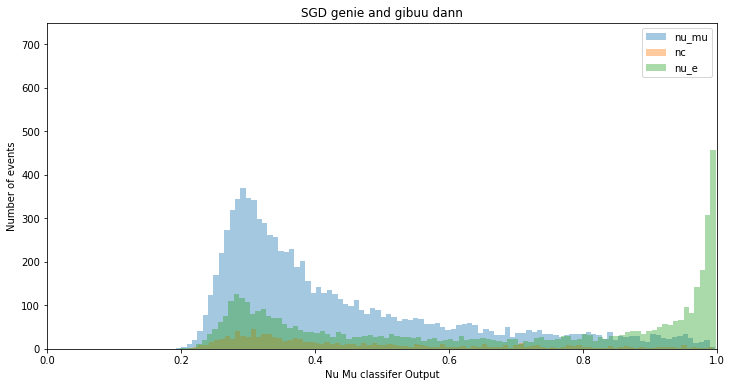

In [21]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i,2])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,2])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,2])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.legend(['nu_mu', 'nc', 'nu_e'], loc='upper right')
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Number of events')
plt.title('SGD genie and gibuu dann')
g.set(ylim=(0,750))
g.set(xlim=(0,1))

[(0, 1)]

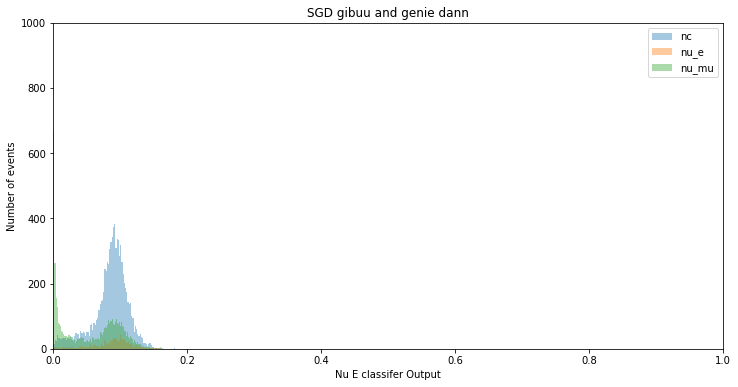

In [29]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i,1])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,1])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,1])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('Nu E classifer Output')
plt.ylabel('Number of events')
plt.title('SGD gibuu and genie dann')
g.set(ylim=(0,1000))
g.set(xlim=(0,1))

[(0, 1)]

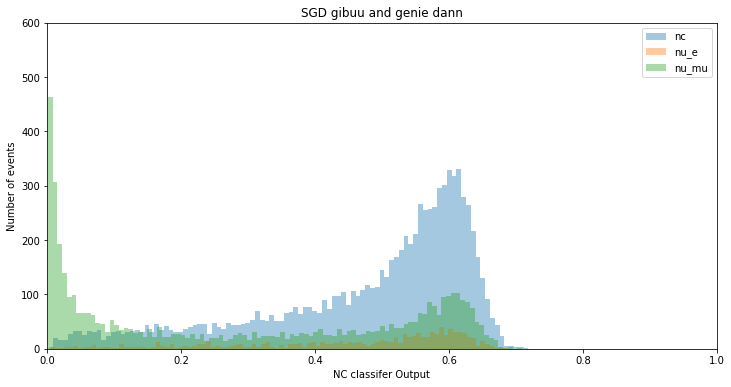

In [30]:
mu_e = []
nc = []
nu_mu = []
for i in range(len(probabilities)):
    if test_vals[i] ==0:
        nc.append(probabilities[i,0])
    elif test_vals[i] ==1:
        mu_e.append(probabilities[i,0])
    elif test_vals[i] ==2:
        nu_mu.append(probabilities[i,0])
        
plt.figure(figsize=(12,6))
g = sns.distplot(nc, bins = 100, kde=False)
g = sns.distplot(mu_e, bins = 100, kde=False)
g = sns.distplot(nu_mu, bins = 100, kde=False)
plt.legend(['nc', 'nu_e','nu_mu'], loc='upper right')
plt.xlabel('NC classifer Output')
plt.ylabel('Number of events')
plt.title('SGD gibuu and genie dann')
g.set(ylim=(0,600))
g.set(xlim=(0,1))

In [31]:
purity_list = []
efficiency_list = []
p_x_e_list = []

gibuu_weights=[float(i) for i in gibuu_weights]
 
for j in np.arange(0, 0.99, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i,2]>=j:
                nu_mu_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nu_mu_below.append(probabilities[i,2]*gibuu_weights[i])
                
        elif test_vals[i] ==0:         
            if probabilities[i,2]>=j:
                nc_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nc_below.append(probabilities[i,2]*gibuu_weights[i])
                
        elif test_vals[i] ==1:        
            if probabilities[i,2]>=j:
                nu_e_above.append(probabilities[i,2]*gibuu_weights[i])
            elif probabilities[i,2]<=j:
                nu_e_below.append(probabilities[i,2]*gibuu_weights[i])
                
        
                
    purity = len(nu_mu_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_mu_above)/(len(nu_mu_above)+len(nu_mu_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    


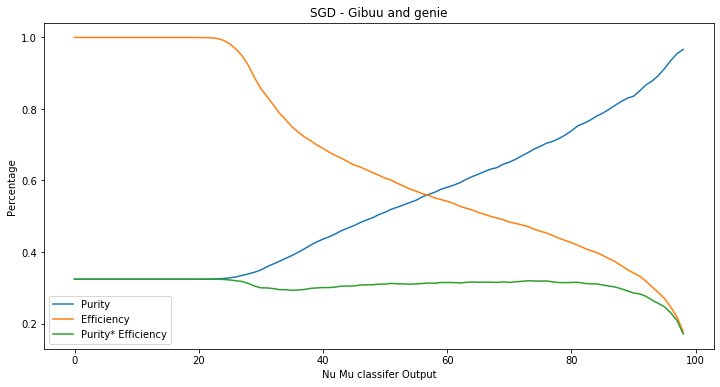

In [32]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu Mu classifer Output')
plt.ylabel('Percentage')
plt.title('SGD - Gibuu and genie')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')

In [33]:
purity_list = []
efficiency_list = []
p_x_e_list = []
 
for j in np.arange(0, 0.25, 0.01):
    nu_mu_above = []
    nu_mu_below = []
    nc_above = []
    nc_below = []
    nu_e_above = []
    nu_e_below = []
    for i in range(len(probabilities)):
        if test_vals[i] ==2:
            if probabilities[i,1]>=j:
                nu_mu_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nu_mu_below.append(probabilities[i,1]*gibuu_weights[i])
            
                
        elif test_vals[i] ==0:         
            if probabilities[i,1]>=j:
                nc_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nc_below.append(probabilities[i,1]*gibuu_weights[i])
            
                
        elif test_vals[i] ==1:        
            if probabilities[i,1]>=j:
                nu_e_above.append(probabilities[i,1]*gibuu_weights[i])
            elif probabilities[i,1]<=j:
                nu_e_below.append(probabilities[i,1]*gibuu_weights[i])
                
        
                
    purity = len(nu_e_above)/(len(nc_above)+len(nu_mu_above)+len(nu_e_above))
    purity_list.append(purity)

    efficiency = len(nu_e_above)/(len(nu_e_above)+len(nu_e_below))
    efficiency_list.append(efficiency)

    p_x_e_list.append(purity*efficiency)
    

ZeroDivisionError: division by zero

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(purity_list)
plt.plot(efficiency_list)
plt.plot(p_x_e_list)
plt.xlabel('Nu E classifer Output')
plt.ylabel('Percentage')
plt.title('SGD - Gibuu and genie ')
plt.legend(['Purity', 'Efficiency', 'Purity* Efficiency'], loc='lower left')